<a href="https://colab.research.google.com/github/ujjwalkar0/Phishing-Domain-Detection/blob/main/Notebook/Phishing%20Domain%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phishing Websites Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Phishing Website Detection

/content/drive/MyDrive/Phishing Website Detection


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
data = pd.read_csv('dataset.csv')
data.drop_duplicates(inplace=True) # Drop Duplicate Data

data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [5]:
data.tls_ssl_certificate.unique()

array([0, 1])

In [6]:
data["asn_ip"].unique()

array([ 60781,  36024,   4766, ...,   6753, 393386,   6794])

# Data Visualization

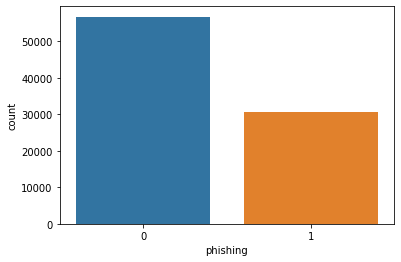

In [7]:
sns.countplot(data=data, x='phishing')
plt.show()

In [8]:
print("1 :", data.phishing.sum())
print("0 :", data.shape[0]-data.phishing.sum())

1 : 30497
0 : 56712


In [9]:
X = data.drop(columns=["phishing"])
y = data.phishing

# Feature Selection

1. Dropping Constant Features
2. Removing Highly Correlated Features

## 1. Dropping constant features


In [10]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit(X)

print("Total Columns :",len(var.get_support()))
print("Columns Dropped :",len(var.get_support()) - sum(var.get_support()))

X_new = X[X.columns[var.get_support()]]

print("Columns Left :",len(X_new.columns))

Total Columns : 111
Columns Dropped : 13
Columns Left : 98


## 2. Drop Highly Correlated Features

In [11]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [12]:
corr_features = correlation(X, .6)
sum(var.get_support()) - len(corr_features)
X_new = X.drop(corr_features, axis=1)

In [13]:
print("Number of Column Dropped", len(X.columns) - len(X_new.columns) )

X = X_new
print("Columns Left :",len(X_new.columns))

Number of Column Dropped 57
Columns Left : 54


## 3. Mutual Information

The Mutual Information between two random variables measures how much information can be obtained from a random variable by observing another random variable.from sklearn.model_selection import train_test_split

In [14]:
from sklearn.feature_selection import mutual_info_classif

In [15]:
a = mutual_info_classif(X,y)

In [16]:
a.shape

(54,)

In [17]:
a

array([6.08284173e-02, 4.95009788e-02, 3.89418780e-02, 3.74462494e-01,
       7.69813982e-03, 6.24937779e-02, 2.07750728e-02, 0.00000000e+00,
       0.00000000e+00, 3.30191286e-03, 8.39087088e-04, 1.38417751e-03,
       0.00000000e+00, 1.06329242e-04, 2.65864149e-03, 1.03322563e-02,
       4.23200868e-02, 7.10390635e-02, 4.13915519e-03, 0.00000000e+00,
       1.54807538e-03, 4.89091663e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.67588119e-04, 0.00000000e+00, 0.00000000e+00,
       2.64663740e-03, 1.59153414e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.37271553e-02, 2.67347900e-03,
       0.00000000e+00, 7.63601431e-02, 7.31148105e-02, 7.37549150e-02,
       9.05171283e-03, 1.63210122e-02, 1.71024843e-01, 2.23387448e-01,
       5.39843815e-02, 1.58558102e-02, 1.58058355e-02, 1.49157779e-02,
       9.38997867e-02, 5.44710774e-03, 1.60122317e-02, 0.00000000e+00,
       1.39540650e-03, 4.67742542e-03])

In [18]:
mutual_info = pd.Series(a)
mutual_info.index = X.columns
mutual_info = mutual_info.sort_values(ascending=False)

In [19]:
mutual_info

qty_slash_url              0.374462
time_domain_activation     0.223387
asn_ip                     0.171025
ttl_hostname               0.093900
qty_hyphen_params          0.076360
qty_percent_params         0.073755
qty_slash_params           0.073115
qty_dot_domain             0.071039
qty_equal_url              0.062494
qty_dot_url                0.060828
time_domain_expiration     0.053984
qty_hyphen_url             0.049501
qty_tld_url                0.042320
qty_underline_url          0.038942
qty_at_url                 0.020775
domain_spf                 0.016321
qty_redirects              0.016012
qty_ip_resolved            0.015856
qty_nameservers            0.015806
qty_mx_servers             0.014916
qty_vowels_domain          0.013727
qty_percent_url            0.010332
time_response              0.009052
qty_questionmark_url       0.007698
tls_ssl_certificate        0.005447
url_shortened              0.004677
qty_hyphen_domain          0.004139
qty_tilde_url              0

In [20]:
mutual_info = mutual_info[mutual_info > 0]

In [21]:
len(mutual_info)

39

In [22]:
X = X[mutual_info.index]

# Train Test Split

In [23]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Training with Random Forest Classifier

### Hyperparameter Tuning

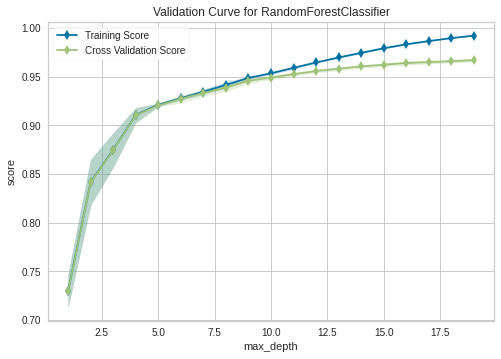

In [24]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestClassifier

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

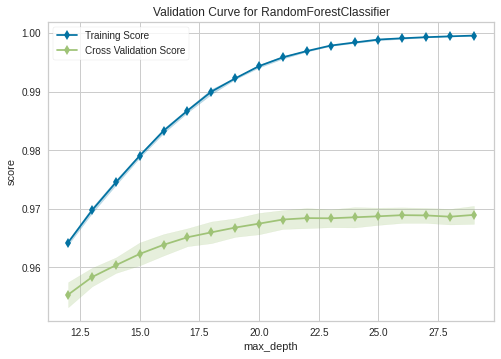

In [25]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(12, 30), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

In [72]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

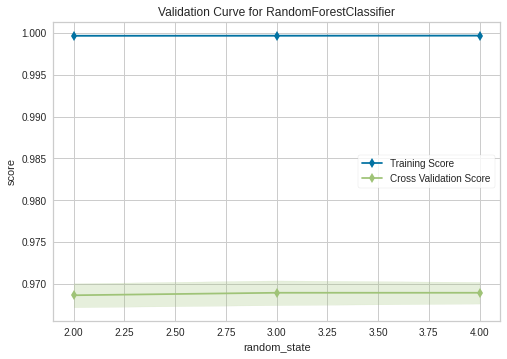

In [27]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(2, 5), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

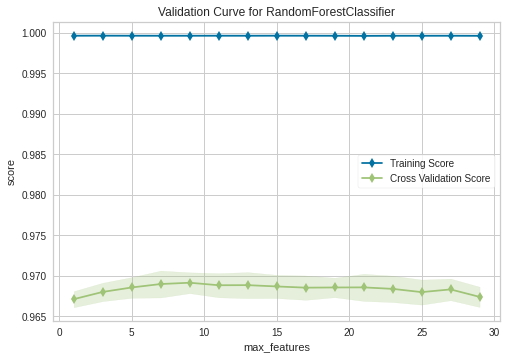

In [50]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_features",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

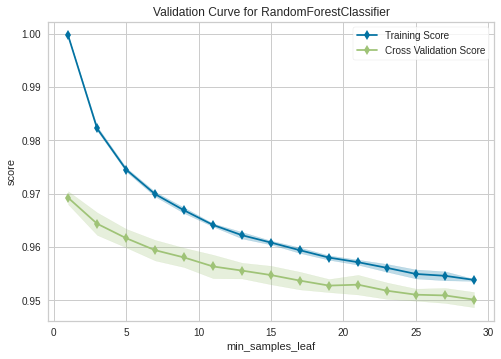

In [57]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_leaf",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

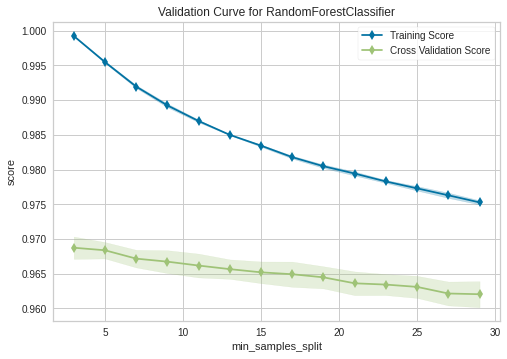

In [58]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_split",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

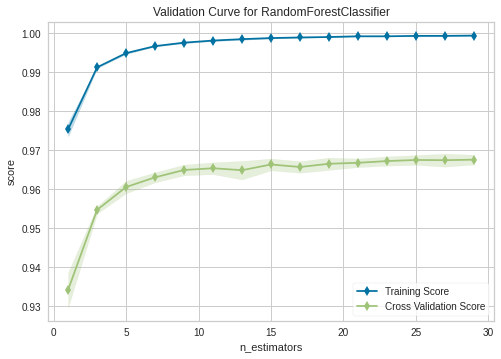

In [61]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_estimators",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

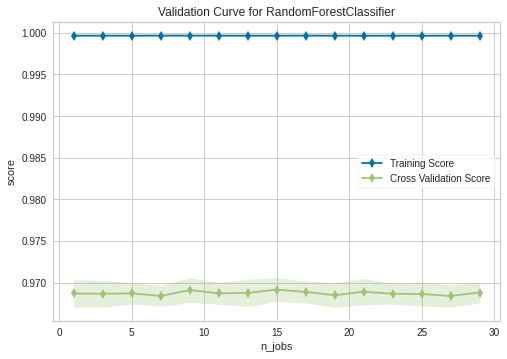

In [62]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_jobs",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3, max_features=8, n_jobs=8, n_estimators=25)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9650439556621148

# Feature Importances

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


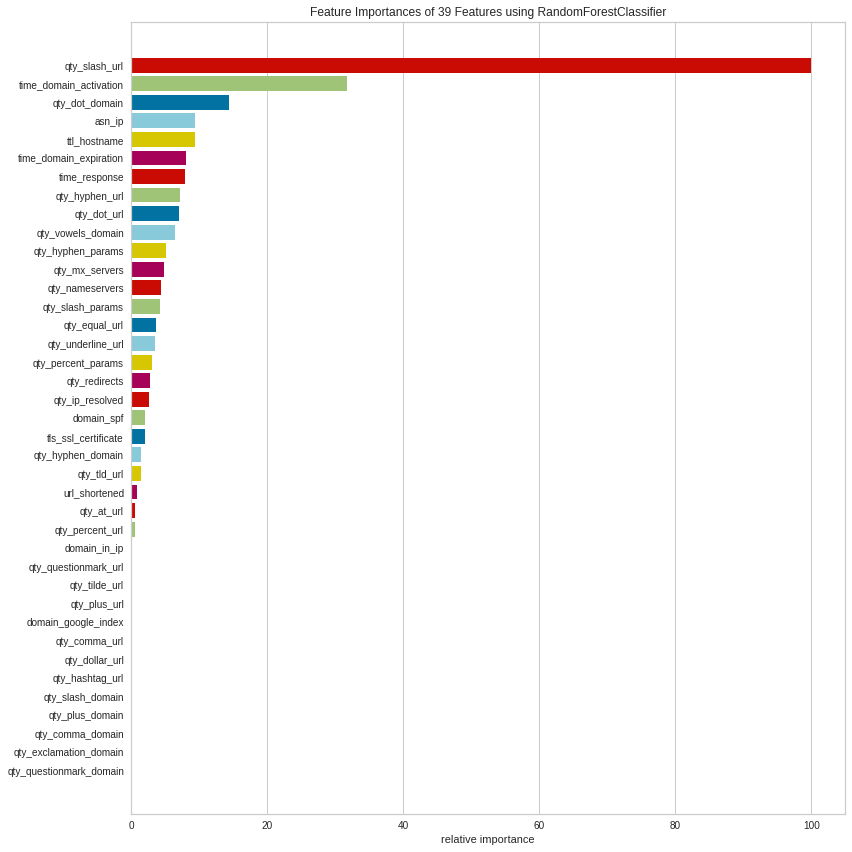

In [29]:
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc)
viz.fit(X, y)
viz.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


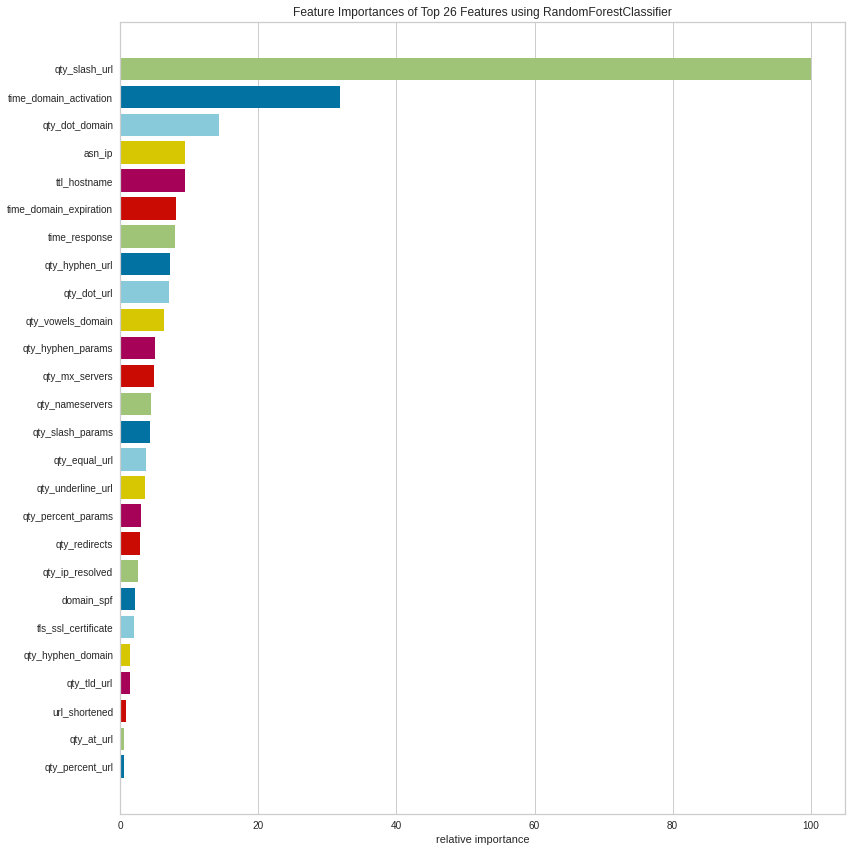

In [30]:
plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc, topn=26)
viz.fit(X, y)
viz.show()

In [31]:
len(viz.features_)

26

In [32]:
X_train = X_train[viz.features_]
X_test = X_test[viz.features_]

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.966433858021474

## Class Prediction Error

In [34]:
import warnings
warnings.simplefilter("ignore")

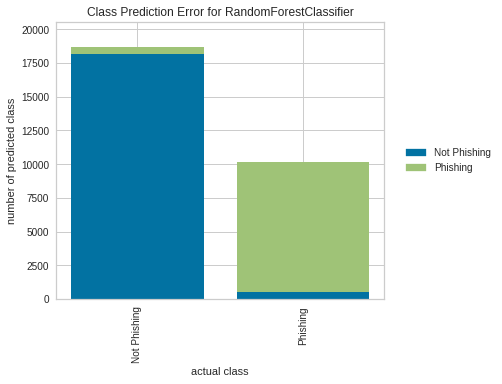

In [35]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

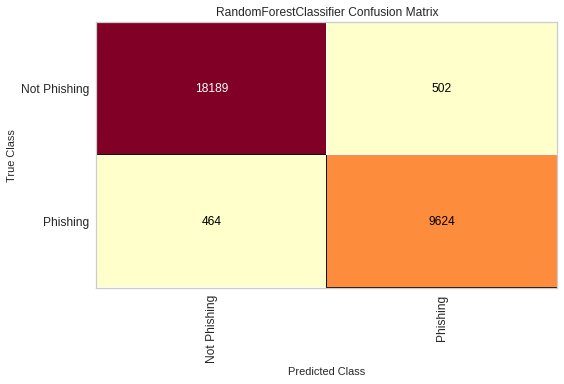

In [36]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
cm.score(X_test, y_test)
cm.show()
plt.show()

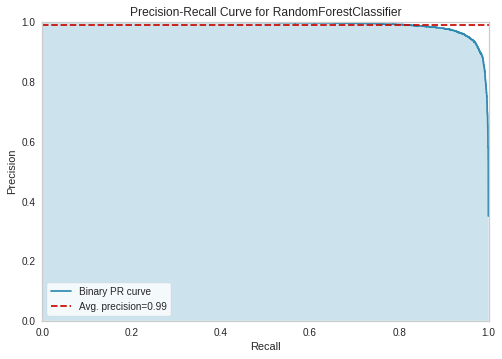

In [37]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(rfc)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

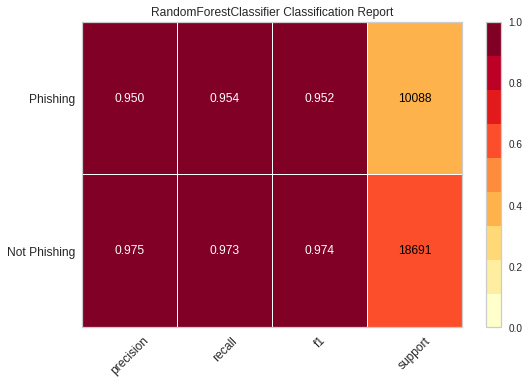

In [38]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'}, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

In [39]:
X_train.columns

Index(['qty_percent_url', 'qty_at_url', 'url_shortened', 'qty_tld_url',
       'qty_hyphen_domain', 'tls_ssl_certificate', 'domain_spf',
       'qty_ip_resolved', 'qty_redirects', 'qty_percent_params',
       'qty_underline_url', 'qty_equal_url', 'qty_slash_params',
       'qty_nameservers', 'qty_mx_servers', 'qty_hyphen_params',
       'qty_vowels_domain', 'qty_dot_url', 'qty_hyphen_url', 'time_response',
       'time_domain_expiration', 'ttl_hostname', 'asn_ip', 'qty_dot_domain',
       'time_domain_activation', 'qty_slash_url'],
      dtype='object')

In [40]:
X_train.head()

,qty_percent_url,qty_at_url,url_shortened,qty_tld_url,qty_hyphen_domain,tls_ssl_certificate,domain_spf,qty_ip_resolved,qty_redirects,qty_percent_params,...,qty_vowels_domain,qty_dot_url,qty_hyphen_url,time_response,time_domain_expiration,ttl_hostname,asn_ip,qty_dot_domain,time_domain_activation,qty_slash_url
20542,0,0,0,1,0,0,-1,1,1,-1,...,7,4,0,0.121921,-1,14388,19089,4,7979,0
24503,0,0,0,1,0,1,0,1,0,-1,...,6,2,0,2.149164,78,14398,26347,2,286,1
22241,0,0,0,1,0,1,0,2,3,-1,...,3,3,1,0.228898,-1,246,2818,3,-1,3
74482,0,0,0,1,0,1,0,2,0,-1,...,2,2,0,0.681484,426,299,13335,2,4686,1
56925,0,0,0,1,0,1,0,1,2,-1,...,7,3,0,3.744493,-1,100,38,3,-1,0


# Save Model

In [41]:
import pickle

with open('model_pkl', 'wb') as files:
    pickle.dump(rfc, files)

In [42]:
ls

dataset.csv  model_pkl  phish.csv
